
https://github.com/Ajaypal91/Predicting-Price-of-Cryptocurrency

In [124]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re


import pandas as pd
import numpy as np
from sklearn import svm
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import datetime

### Read in Datasets

In [125]:
coin_Aave = pd.read_csv('coin_Aave.csv')
coin_BinanceCoin = pd.read_csv('coin_BinanceCoin.csv')
coin_BinanceCoin = pd.read_csv('coin_BinanceCoin.csv')
coin_Bitcoin = pd.read_csv('coin_Bitcoin.csv')
coin_Cardano = pd.read_csv('coin_Cardano.csv')
coin_ChainLink = pd.read_csv('coin_ChainLink.csv')
coin_Cosmos = pd.read_csv('coin_Cosmos.csv')
coin_CryptocomCoin = pd.read_csv('coin_CryptocomCoin.csv')
coin_Dogecoin = pd.read_csv('coin_Dogecoin.csv')
coin_EOS = pd.read_csv('coin_EOS.csv')
coin_Ethereum = pd.read_csv('coin_Ethereum.csv')
coin_Iota = pd.read_csv('coin_Iota.csv')
coin_Litecoin = pd.read_csv('coin_Litecoin.csv')
coin_Monero = pd.read_csv('coin_Monero.csv')
coin_NEM = pd.read_csv('coin_NEM.csv')
coin_Polkadot = pd.read_csv('coin_Polkadot.csv')
coin_Solana = pd.read_csv('coin_Solana.csv')
coin_Stellar = pd.read_csv('coin_Stellar.csv')
coin_Tether = pd.read_csv('coin_Tether.csv')
coin_Tron = pd.read_csv('coin_Tron.csv')
coin_Uniswap = pd.read_csv('coin_Uniswap.csv')
coin_WrappedBitcoin = pd.read_csv('coin_WrappedBitcoin.csv')
coin_USDCoin = pd.read_csv('coin_USDCoin.csv')
coin_XRP = pd.read_csv('coin_XRP.csv')
coin_drgn = pd.read_csv('price_drgn.csv')

### Explore the Data

In [126]:
coin_Bitcoin

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2857,2858,Bitcoin,BTC,2021-02-23 23:59:59,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,9.099259e+11
2858,2859,Bitcoin,BTC,2021-02-24 23:59:59,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,9.263931e+11
2859,2860,Bitcoin,BTC,2021-02-25 23:59:59,51948.966982,47093.853019,49709.082425,47093.853019,5.450657e+10,8.777661e+11
2860,2861,Bitcoin,BTC,2021-02-26 23:59:59,48370.785260,44454.842114,47180.464054,46339.760083,3.509679e+11,8.637523e+11


#### Function to convert datetime, sort values, and drop duplicates

In [127]:
def convert_date(df,column_date_name,column_price_name):
    # Convert column with dates to datetime objects
    df[column_date_name] = pd.to_datetime(df[column_date_name])

    # Sort values by productId and startDtTime to ensure correct order
    df.sort_values(by=[column_price_name,column_date_name], inplace=True)

    # Drop the duplicates
    df.drop_duplicates([column_price_name], keep='last', inplace=True)
    
    return df

In [128]:
coin_Bitcoin = convert_date(coin_Bitcoin,'Date','Close')
coin_Ethereum = convert_date(coin_Ethereum,'Date','Close')

#### Check to see if the shapes match

In [129]:
close_bitcoin = coin_Bitcoin['Close']
np.shape(coin_Bitcoin)

(2849, 10)

In [130]:
close_Ethereum = coin_Ethereum['Close']
np.shape(coin_Ethereum)

(2029, 10)

#### They dont match, so lets fix that

What date did the bitcoin data begin? What date did the bitcoin data end?

In [131]:
print("Start : " + str(coin_Bitcoin['Date'][0]))
print ("End : " + str(coin_Bitcoin['Date'][len(coin_Bitcoin)-2:-1]))

Start : 2013-04-29 23:59:59
End : 2854   2021-02-20 23:59:59
Name: Date, dtype: datetime64[ns]


What date did the ethereum data start? When does it End?

In [132]:
print("Start : " + str(coin_Ethereum['Date'][0]))
print ("End : " + str(coin_Ethereum['Date'][len(coin_Ethereum)-2:-1]))

Start : 2015-08-08 23:59:59
End : 2021   2021-02-18 23:59:59
Name: Date, dtype: datetime64[ns]


So, now we need to make Ethereum and Bitcoin Data sets start and end on the same day. Since ethereum start later we need to find the index of then the bitcoin start on that day and cut the dataset down. 

In [133]:
coin_Bitcoin['Date'].loc[coin_Bitcoin['Date'] == '2015-08-08 23:59:59']

831   2015-08-08 23:59:59
Name: Date, dtype: datetime64[ns]

In [134]:
coin_Bitcoin['Date'].loc[coin_Bitcoin['Date'] == '2021-02-18 23:59:59']

2852   2021-02-18 23:59:59
Name: Date, dtype: datetime64[ns]

Okay, so the index is 831, lets cut to down to fit. 

In [135]:
start_index = 831
end_index = 2852

coin_Bitcoin_update = coin_Bitcoin[start_index:end_index]
np.shape(coin_Bitcoin_update)

(2018, 10)

In [136]:
np.shape(coin_Ethereum)

(2029, 10)

still not the same size....damn it

So, now we are going to have to find the missing dates and make sure all the other dates match up 

In [137]:
#Tried these two methods and they did not work

In [138]:
#pd.date_range(start = '2015-08-08 23:59:59', end = '2021-02-18 23:59:59' ).difference(coin_Bitcoin.index)

In [139]:
#check_df = coin_Bitcoin.reindex(pd.date_range('2015-08-08 23:59:59', '2021-02-18 23:59:59')).isnull().all(1)
#check_df

Well that didnt help much...

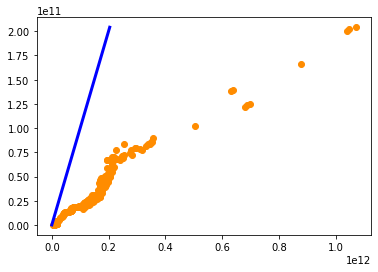

In [140]:
#This code was taken directly from 
# https://github.com/Ajaypal91/Predicting-Price-of-Cryptocurrency/blob/master/Models/linear_regression.py

msk = np.random.rand(len(coin_Bitcoin_update)) < 0.8

X = coin_Bitcoin_update["Marketcap"]
Y = coin_Ethereum[:len(coin_Bitcoin_update)]["Marketcap"]

X_train = np.array(X[msk]).reshape(len(X[msk]),1)
X_test = np.array(X[~msk]).reshape(len(X[~msk]),1)
Y_train = np.array(Y[msk]).reshape(len(X[msk]),1)
Y_test = np.array(Y[~msk]).reshape(len(X[~msk]),1)

clf = linear_model.LinearRegression()
clf.fit(X_train,Y_train)
predicted_vals = clf.predict(X_test)

plt.scatter(X_test, Y_test, color='darkorange', label='data')
plt.plot(Y_test, Y_test, color='blue', linewidth=3)
plt.show()

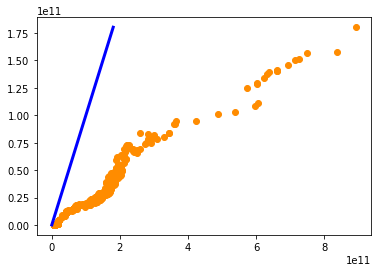

In [141]:

msk = np.random.rand(len(coin_Bitcoin_update)) < 0.7

X = coin_Bitcoin_update["Marketcap"]
Y = coin_Ethereum[:len(coin_Bitcoin_update)]["Marketcap"]

X_train = np.array(X[msk]).reshape(len(X[msk]),1)
X_test = np.array(X[~msk]).reshape(len(X[~msk]),1)
Y_train = np.array(Y[msk]).reshape(len(X[msk]),1)
Y_test = np.array(Y[~msk]).reshape(len(X[~msk]),1)

clf = linear_model.LinearRegression()
clf.fit(X_train,Y_train)
predicted_vals = clf.predict(X_test)

plt.scatter(X_test, Y_test, color='darkorange', label='data')
plt.plot(Y_test, Y_test, color='blue', linewidth=3)
plt.show()

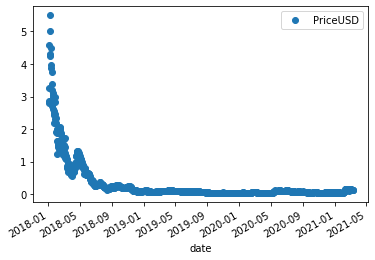

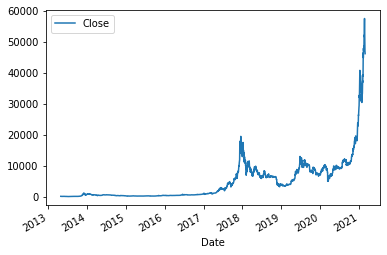

In [142]:
convert_date(coin_drgn,'date','PriceUSD')
coin_drgn.plot(x='date', y='PriceUSD', style='o')
coin_Bitcoin.plot(x="Date",y = "Close", style = '-')


In [143]:
coin_drgn['date'].sort_values(ascending = True)

33     2018-01-02
34     2018-01-03
35     2018-01-04
36     2018-01-05
37     2018-01-06
          ...    
1193   2021-03-07
1194   2021-03-08
1195   2021-03-09
1196   2021-03-10
1197   2021-03-11
Name: date, Length: 1162, dtype: datetime64[ns]

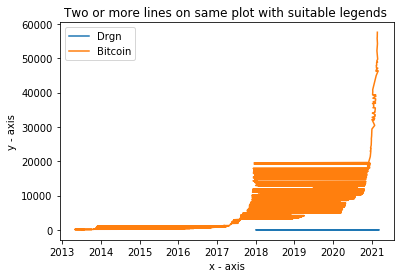

In [144]:
plt.plot(coin_drgn['date'],coin_drgn['PriceUSD'], label = "Drgn")
plt.plot(coin_Bitcoin['Date'], coin_Bitcoin['Close'], label = "Bitcoin")
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Two or more lines on same plot with suitable legends ')
plt.legend()
plt.show()

In [145]:
coin_drgn

,date,AdrActCnt,CapMrktCurUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
867,2020-04-15,85.0,9.162021e+06,0.0,0.0,119.907295,161.664880,0.000003,0.021135,-80.898975,...,7.640920e+04,40931.328648,865.094589,4575.979223,96.714546,4.461515e+06,9.429531e+04,0.094543,0.078002,0.112581
862,2020-04-10,56.0,9.311607e+06,0.0,0.0,412.304541,162.824373,0.000003,0.021480,-80.237136,...,2.258429e+04,16317.032389,350.495370,3572.000000,76.727767,1.109558e+06,2.383369e+04,0.094794,0.134246,0.113133
872,2020-04-20,52.0,9.313110e+06,0.0,0.0,255.659410,158.901123,0.000003,0.021484,-79.609730,...,3.642780e+04,36487.718315,783.895013,3003.000000,64.515865,2.079800e+06,4.468202e+04,0.094663,0.051212,0.112413
873,2020-04-21,86.0,9.410771e+06,0.0,0.0,226.330586,159.913717,0.000003,0.021709,-79.894196,...,4.157976e+04,15577.579952,338.175137,2309.491181,50.136960,2.149706e+06,4.666817e+04,0.094668,0.046708,0.112188
868,2020-04-16,87.0,9.443997e+06,0.0,0.0,112.219062,164.266325,0.000003,0.021786,-80.938407,...,8.415680e+04,28030.193319,610.658513,7716.984200,168.120214,4.372710e+06,9.526273e+04,0.094479,0.074349,0.112721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,2018-01-12,1726.0,1.945832e+09,0.0,0.0,193.468972,NaN,0.000326,4.488713,NaN,...,1.005759e+07,1319.502089,5922.865749,195.179100,876.102900,2.260307e+06,1.014587e+07,NaN,NaN,NaN
37,2018-01-06,1601.0,1.982032e+09,0.0,0.0,120.917600,NaN,0.000267,4.572220,NaN,...,1.639159e+07,2444.430156,11176.473645,299.000000,1367.093926,3.669090e+06,1.677589e+07,NaN,NaN,NaN
38,2018-01-07,2591.0,2.167381e+09,0.0,0.0,45.084305,NaN,0.000308,4.999790,NaN,...,4.807396e+07,3643.526991,18216.870936,282.408600,1411.983781,9.892176e+06,4.945880e+07,NaN,NaN,NaN
40,2018-01-09,1928.0,2.381237e+09,0.0,0.0,97.499235,NaN,0.000382,5.493121,NaN,...,2.442314e+07,2560.418208,14064.686979,249.107393,1368.377046,4.552424e+06,2.500701e+07,NaN,NaN,NaN
